# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [134]:
import sqlite3 as sl
import pandas as pd


In [135]:
sales_df = pd.read_excel('SalesJournal 2005-2021.xlsx',sheet_name=0)
cust_df = pd.read_excel('SalesJournal 2005-2021.xlsx',sheet_name=1)

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [136]:
print(cust_df.isnull().sum()) # How many nulls in my cust columns

Customer ID       0
Cust Since        0
City             21
State            21
Zip              31
Cust Type      3194
Active?           0
Sales Rep      2391
Sales Acct        0
dtype: int64


In [137]:
cust_df.head(5)


,Customer ID,Cust Since,City,State,Zip,Cust Type,Active?,Sales Rep,Sales Acct
0,103,2008-07-21,Overland Park,KS,66210,COMM,Active,GCP3,30900
1,10975,2008-07-21,Overland Park,Ks,66210,NaN,Active,GCP3,30900
2,1509WALN,2018-12-12,KANSAS CITY,MO,64106,SNOW,Active,SNOW,30800
3,1617,2008-07-15,NaN,NaN,NaN,NaN,Inactive,NaN,30200
4,1906WYAN,2019-01-28,Kansas City,MO,64108,SNOW,Active,SNOW/GEORGE,30800


In [138]:
print(sales_df.isnull().sum()) # How many nulls in my sales columns

Customer ID                0
Account ID                 0
Account Description        0
Invoice/CM #               0
Date                       0
Debit Amnt             56646
Credit Amnt             1591
Last Inv Date              0
Sales Rep ID             271
Job ID                   696
dtype: int64


In [139]:
sales_df.head(5)

,Customer ID,Account ID,Account Description,Invoice/CM #,Date,Debit Amnt,Credit Amnt,Last Inv Date,Sales Rep ID,Job ID
0,WATERO,30020,Sales - Turf Repair,37144,2020-04-01,NaN,2607.75,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
1,WATERO,30020,Sales - Turf Repair,37147,2020-04-01,NaN,3806.04,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
2,WATERO,30020,Sales - Turf Repair,37148,2020-04-02,NaN,2070.17,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
3,WATERO,30020,Sales - Turf Repair,37155,2020-04-03,NaN,3558.18,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
4,WATERO,30020,Sales - Turf Repair,37172,2020-04-10,NaN,2825.81,2021-12-29,JAMESV,"20001-02JV,15-Turf Repair,00-REVENUE"


In [140]:
# Set null credit and debit amounts to zero to use in calculating Total Sales
sales_df['Debit Amnt'] = sales_df['Debit Amnt'].fillna(0)
sales_df['Credit Amnt'] = sales_df['Credit Amnt'].fillna(0)

In [141]:
print(sales_df.isnull().sum()) # Check if nulls in debit and credit columns set to zero

Customer ID              0
Account ID               0
Account Description      0
Invoice/CM #             0
Date                     0
Debit Amnt               0
Credit Amnt              0
Last Inv Date            0
Sales Rep ID           271
Job ID                 696
dtype: int64


In [142]:
sales_df.head(5)

,Customer ID,Account ID,Account Description,Invoice/CM #,Date,Debit Amnt,Credit Amnt,Last Inv Date,Sales Rep ID,Job ID
0,WATERO,30020,Sales - Turf Repair,37144,2020-04-01,0.0,2607.75,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
1,WATERO,30020,Sales - Turf Repair,37147,2020-04-01,0.0,3806.04,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
2,WATERO,30020,Sales - Turf Repair,37148,2020-04-02,0.0,2070.17,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
3,WATERO,30020,Sales - Turf Repair,37155,2020-04-03,0.0,3558.18,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
4,WATERO,30020,Sales - Turf Repair,37172,2020-04-10,0.0,2825.81,2021-12-29,JAMESV,"20001-02JV,15-Turf Repair,00-REVENUE"


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [143]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4039 entries, 0 to 4038
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer ID  4039 non-null   object        
 1   Cust Since   4039 non-null   datetime64[ns]
 2   City         4018 non-null   object        
 3   State        4018 non-null   object        
 4   Zip          4008 non-null   object        
 5   Cust Type    845 non-null    object        
 6   Active?      4039 non-null   object        
 7   Sales Rep    1648 non-null   object        
 8   Sales Acct   4039 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 284.1+ KB


In [144]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58236 entries, 0 to 58235
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Customer ID          58236 non-null  object        
 1   Account ID           58236 non-null  int64         
 2   Account Description  58236 non-null  object        
 3   Invoice/CM #         58236 non-null  object        
 4   Date                 58236 non-null  datetime64[ns]
 5   Debit Amnt           58236 non-null  float64       
 6   Credit Amnt          58236 non-null  float64       
 7   Last Inv Date        58236 non-null  datetime64[ns]
 8   Sales Rep ID         57965 non-null  object        
 9   Job ID               57540 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 4.4+ MB


In [145]:
sales_df.describe()

,Account ID,Debit Amnt,Credit Amnt
count,58236.000000,58236.000000,58236.000000
mean,30555.453070,28.169344,871.023895
std,290.214553,602.535517,3032.098339
min,30020.000000,0.000000,0.000000
25%,30200.000000,0.000000,80.000000
50%,30800.000000,0.000000,200.000000
75%,30810.000000,0.000000,578.125000
max,30900.000000,61515.000000,213110.000000


<AxesSubplot:xlabel='Credit Amnt'>

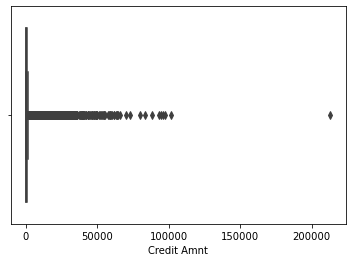

In [146]:
import seaborn as sns
sns.boxplot(x=sales_df['Credit Amnt'])

In [147]:
# Checking to see the outlier and after checking with the salesman this is a correct invoice.  
# Just much larger than typical sale

sales_df.loc[sales_df['Credit Amnt'] > 150000]

,Customer ID,Account ID,Account Description,Invoice/CM #,Date,Debit Amnt,Credit Amnt,Last Inv Date,Sales Rep ID,Job ID
17136,MCLA,30200,Sales - Landscaping,37938,2020-12-07,0.0,213110.0,2021-11-12,GABE,"20117-02GCC,02-PLANTING,00-REVENUE"


<AxesSubplot:xlabel='Debit Amnt'>

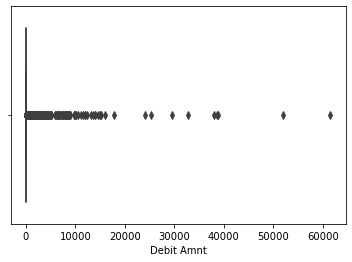

In [148]:
sns.boxplot(x=sales_df['Debit Amnt'])

In [149]:
# Look at the rows with large debit amount & invoice greater than 2010
# I will be looking at sales revenue from 2010 - 2021 but need the 2005-2009 data to determine if prev customer

df_filtered = sales_df.loc[(sales_df['Debit Amnt'] > 20000) & (sales_df['Date']>= '2010-01-01')]

print(df_filtered)

      Customer ID  Account ID  Account Description Invoice/CM #       Date  \
9265       WATERO       30200  Sales - Landscaping      24363CR 2012-04-02   
12433        GAHA       30200  Sales - Landscaping        29304 2015-06-23   
12641       CATEN       30200  Sales - Landscaping        29526 2015-09-11   
13853     MARTIND       30200  Sales - Landscaping       31689V 2017-04-20   
16463       PECKH       30200  Sales - Landscaping      36094CM 2020-02-25   

       Debit Amnt  Credit Amnt Last Inv Date Sales Rep ID  \
9265     25263.42          0.0    2021-12-29          TOM   
12433    29500.00          0.0    2015-06-23         GABE   
12641    51928.00          0.0    2015-12-16         COLE   
13853    32816.40          0.0    2017-12-01       MIKEHU   
16463    61515.00          0.0    2020-02-25         GABE   

                                   Job ID  
9265    12003-02TB,02-PLANTING,00-REVENUE  
12433  15008-02GCC,02-PLANTING,00-REVENUE  
12641   15210-02CW,02-PLANTING,0

In [150]:
sales_df.shape  # Look at shape before dropping rows

(58236, 10)

In [151]:
# After discussion with business mgr and looking more closely at the data, 
# it was decided the large debit columns needed to be dropped to better represent sales revenue

sales_df = sales_df.drop(sales_df.index[sales_df['Debit Amnt'] > 26000])

In [152]:
sales_df.shape # Make sure the rows were dropped

(58229, 10)

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [153]:
cust_df.columns

Index(['Customer ID', 'Cust Since', 'City', 'State', 'Zip', 'Cust Type',
       'Active?', 'Sales Rep', 'Sales Acct'],
      dtype='object')

In [154]:
# drop columns from customer file not needed
cust_df = cust_df.drop(['Active?','Sales Rep','Sales Acct','Cust Type'], axis=1)
cust_df.columns

Index(['Customer ID', 'Cust Since', 'City', 'State', 'Zip'], dtype='object')

In [155]:
sales_df.columns

Index(['Customer ID', 'Account ID', 'Account Description', 'Invoice/CM #',
       'Date', 'Debit Amnt', 'Credit Amnt', 'Last Inv Date', 'Sales Rep ID',
       'Job ID'],
      dtype='object')

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [156]:
# Any duplicate rows in cust?
duplicate_rows_df = cust_df[cust_df.duplicated()]
print(duplicate_rows_df.shape)

(0, 5)


In [157]:
# Any duplicate rows in sales?
duplicate_rows_df = sales_df[sales_df.duplicated()]
print(duplicate_rows_df.shape)

(665, 10)


In [158]:
duplicate_rows_df.head() # After looking at sample of duplicate rows, it is valid to have duplicates

,Customer ID,Account ID,Account Description,Invoice/CM #,Date,Debit Amnt,Credit Amnt,Last Inv Date,Sales Rep ID,Job ID
374,WALJ,30100,Sales - Lighting,8121,2006-03-01,0.0,65.0,2008-03-10,SVC,"06997-01S,20-SERVICE,00-REVENUE"
784,ANAN,30100,Sales - Lighting,17572,2009-08-31,0.0,75.0,2010-11-12,SVC,"09997-01S,20-SERVICE,00-REVENUE"
849,NEWB,30100,Sales - Lighting,21230,2010-11-23,0.0,15.0,2021-11-30,LARRY,"10022-01LM,01-LIGHTING,00-REVENUE"
968,OTTO,30200,Sales - Landscaping,6525,2005-03-28,0.0,48.0,2005-03-28,ANDYW,"05027-02AW,02-PLANTING,00-REVENUE"
989,OLND,30200,Sales - Landscaping,6551,2005-03-31,0.0,144.0,2010-03-31,ANDYW,"05030-02AW,02-PLANTING,00-REVENUE"


In [159]:
# Convert city and state to uppercase

cust_df['City'] = cust_df['City'].str.upper()
cust_df['State'] = cust_df['State'].str.upper()
cust_df

,Customer ID,Cust Since,City,State,Zip
0,103,2008-07-21,OVERLAND PARK,KS,66210
1,10975,2008-07-21,OVERLAND PARK,KS,66210
2,1509WALN,2018-12-12,KANSAS CITY,MO,64106
3,1617,2008-07-15,NaN,NaN,NaN
4,1906WYAN,2019-01-28,KANSAS CITY,MO,64108
...,...,...,...,...,...
4034,ZALM,2001-03-26,OVERLAND PARK,KS,66213
4035,ZAND,2005-10-05,LEAWOOD,KS,66206
4036,ZEY,2004-07-02,LEAWOOD,KS,66206
4037,ZOOK,2007-01-08,STILWELL,KS,66085


In [160]:
# Export Customer file to CSV files
cust_df.to_csv('Customer.csv')

In [161]:
# Export Sales file to CSV files
sales_df.to_csv('Sales.csv')

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?

   I had to change some nulls into zeroes, delete some outliers in the sales dataframe, and delete columns I didn't need.
   
2. Did the process of cleaning your data give you new insights into your dataset?

    Yes.  I had a better understanding of how the invoices were entered 
    
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

    I need to aggregate the credit and debit for an invoice number, subtract the debits from the credits to create a single row with Sales_Total.
    I also need to compare the invoice date with last invoice date to determine if this sale is a repeat column and create a column 'Repeat Customer' with 'Y' or 'N' value